In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Xtrain=pickle.load(open('Xtrain','rb'))
Ytrain=pickle.load(open('Ytrain','rb'))
Xtest=pickle.load(open('Xtest','rb'))
Ytest=pickle.load(open('Ytest','rb'))

In [3]:
from tensorflow.keras.utils import to_categorical as toc
ytrain_one=toc(Ytrain)
ytest_one=toc(Ytest)
Xtrain

array([[[[ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        [[ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        [[ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        ...,

        [[ 68,  68,  68],
         [ 69,  69,  69],
         [140, 140, 140],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        [[ 68,  68,  68],
         [ 69,  69,  69],
         [ 69,  69,  69],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        [[ 68,  68,  68],
         [ 70,  70,  70],
         [ 69,  69,  69],
         ...,
         [ 69,  69,  69],
        

In [4]:
print(ytrain_one)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [5]:
print(Ytrain)

[1 1 1 ... 1 0 0]


In [6]:
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)
inputshape=Xtrain.shape[1:]

(9484, 128, 128, 3) (9484,) (2372, 128, 128, 3) (2372,)


# LENET 5

In [7]:
def Lenet5():
    feature=Sequential()
    
    feature.add(Conv2D(4,(5,5),strides=1,input_shape=inputshape,kernel_initializer='he_uniform',activation="sigmoid"))
    feature.add(MaxPooling2D((2,2),strides=2))
    
    feature.add(Conv2D(6,(5,5),strides=1,activation="sigmoid"))
    feature.add(MaxPooling2D((2,2),strides=2))
    
    feature.add(Conv2D(6,(5,5),strides=1,activation="sigmoid"))
    feature.add(MaxPooling2D((2,2),strides=2))
    
    feature.add(Flatten())

    
    return feature

In [8]:
d=Lenet5()
d.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 6)         606       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 6)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 6)         906       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0

In [9]:
paramx=d.output
paramy=Dense(120,activation="sigmoid")(paramx)

output=Dense(2,activation="softmax")(paramy)

In [10]:
Lenet5=Model(inputs=d.input,outputs=output)
Lenet5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 6)         606       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 6)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 6)         906   

In [11]:
Lenet5.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
le=Lenet5.fit(Xtrain,ytrain_one,validation_data=(Xtest,ytest_one),epochs=30,batch_size=120)

Epoch 1/30
80/80 [==============================] - 140s 210ms/step - loss: 0.6287 - accuracy: 0.6333 - val_loss: 0.4691 - val_accuracy: 0.7989
Epoch 2/30
80/80 [==============================] - 15s 179ms/step - loss: 0.4380 - accuracy: 0.7959 - val_loss: 0.3982 - val_accuracy: 0.8390
Epoch 3/30
80/80 [==============================] - 14s 180ms/step - loss: 0.3758 - accuracy: 0.8269 - val_loss: 0.3443 - val_accuracy: 0.8457
Epoch 4/30
80/80 [==============================] - 15s 184ms/step - loss: 0.3313 - accuracy: 0.8504 - val_loss: 0.3148 - val_accuracy: 0.8546
Epoch 5/30
80/80 [==============================] - 15s 183ms/step - loss: 0.3058 - accuracy: 0.8598 - val_loss: 0.3106 - val_accuracy: 0.8554
Epoch 6/30
80/80 [==============================] - 15s 183ms/step - loss: 0.2875 - accuracy: 0.8720 - val_loss: 0.2721 - val_accuracy: 0.8769
Epoch 7/30
80/80 [==============================] - 15s 183ms/step - loss: 0.2697 - accuracy: 0.8837 - val_loss: 0.2698 - val_accuracy: 0.887

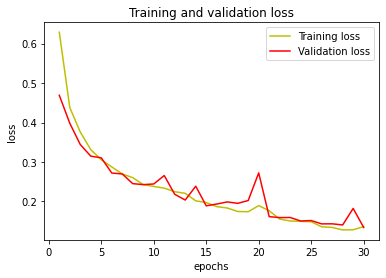

In [12]:
loss=le.history['loss']
val_loss=le.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

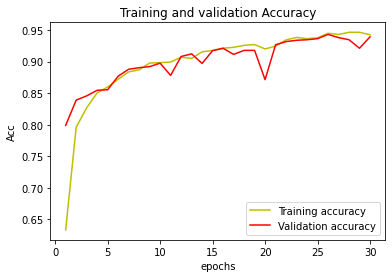

In [13]:
accuracy=le.history['accuracy']
val_accuracy=le.history['val_accuracy']
plt.plot(epochs,accuracy,'y',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [14]:
predict=Lenet5.predict(Xtest)
predict=np.argmax(predict,axis=-1)
print(predict)

[0 1 1 ... 1 0 0]


# CONFUSION MATRIX


<AxesSubplot:>

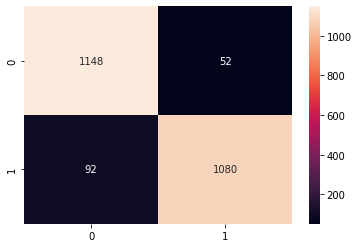

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,predict)
sns.heatmap(cm,annot=True,fmt="g")

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1200
           1       0.95      0.92      0.94      1172

    accuracy                           0.94      2372
   macro avg       0.94      0.94      0.94      2372
weighted avg       0.94      0.94      0.94      2372



# SVM

In [17]:
x_train_f=d.predict(Xtrain)
x_test_f=d.predict(Xtest)

In [18]:
print(x_train_f.shape,x_test_f.shape)

(9484, 864) (2372, 864)


In [19]:
from sklearn.svm import LinearSVC
svmodel=LinearSVC(max_iter=100)
svmodel.fit(x_train_f,Ytrain)

C:\Users\sudhakararao\anaconda3\envs\tf2.4\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100)

In [20]:
predict_svm=svmodel.predict(x_test_f)

In [21]:
print(predict_svm,Ytest)

[0 1 1 ... 1 0 0] [1 1 1 ... 1 0 0]


In [22]:
from sklearn import metrics
print(metrics.accuracy_score(Ytest,predict_svm))

0.9190556492411467


<AxesSubplot:>

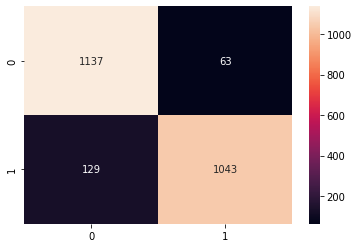

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,predict_svm)
sns.heatmap(cm,annot=True,fmt="g")

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,predict_svm))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1200
           1       0.94      0.89      0.92      1172

    accuracy                           0.92      2372
   macro avg       0.92      0.92      0.92      2372
weighted avg       0.92      0.92      0.92      2372



# RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=10, random_state=300)
RFmodel.fit(x_train_f,Ytrain)

RandomForestClassifier(n_estimators=10, random_state=300)

In [26]:
predict_RF=RFmodel.predict(x_test_f)

In [27]:
from sklearn import metrics
print(metrics.accuracy_score(Ytest,predict_RF))

0.943929173693086


<AxesSubplot:>

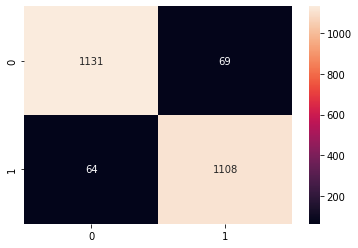

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,predict_RF)
sns.heatmap(cm,annot=True,fmt="g")

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,predict_RF))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1200
           1       0.94      0.95      0.94      1172

    accuracy                           0.94      2372
   macro avg       0.94      0.94      0.94      2372
weighted avg       0.94      0.94      0.94      2372

